<a href="https://colab.research.google.com/github/ECV21/Neural-Networks/blob/main/TensorFlow_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic text classification

El dataset para clasificación binaria de 25,000 películas de entrenamiento y 25,000 para testing.

Feunte: https://ai.stanford.edu/~amaas/data/sentiment/

# Importar librerías

In [1]:
import matplotlib.pyplot as plt #crear gráficos y visualizaciones
import os #para interactuar con sistema operativo; manipular archivos y directorios
import re #para expresiones regulares, analizar y manipulas cadenas de texto
import shutil #gestionar achivos y directorios; copiar, mover y eliminar achivos
import string #manipular cadenas
import tensorflow as tf #para desarrollo de modelos de aprendizaje automáticos y Redes neuronales

from tensorflow.keras import layers #submódulo que proporciona layers(capas) que forman redes neuronales en TensorFlow
from tensorflow.keras import losses #submódulo que tiene funciones de pérdida para entrenar ML


In [2]:
#ver version:

print(tf.__version__)

2.17.0


**Objetivo**: entrenar un modelos de análisis de sentimientos para clasificar reseñas de películas como positivas o negativas, basado en las reviews. Esto para ejemplificar el modelo de clasificación binaria.

El dataset tiene 50,000 reseñas de películas de Internet Movies Database; dividir en 25,000 para training y 25000 para testing.

In [4]:
ruta_base= "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz" #definir URL

 #descargar achivo de URL,descomprimir,almacenar localmente
base= tf.keras.utils.get_file("aclImdb_v1.tar.gz", #nombre de archivo al almancenarlo localmente
                              ruta_base, #URL del archivo
                              untar=True, #en caso de arhivo esté comprimido, descomprimir
                              cache_dir='.', #amlancenar en directorio actual
                              cache_subdir='') #mo se creará subdirectorio
base_dir = os.path.join(os.path.dirname(base), 'aclImdb') #obtener ruta del directorio base

84125825/84125825 ━━━━━━━━━━━━━━━━━━━━ 12s 0us/step


In [5]:
os.listdir(base_dir) #ver nombre del contenido del directorio base

['README', 'train', 'imdbEr.txt', 'imdb.vocab', 'test']

In [6]:
train_dir = os.path.join(base_dir, 'train') #obtener ruta del directorio train; combina el directorio: BASE_DIR + "TRAIN"
os.listdir(train_dir) #ver nombre del contenido del directorio train

['urls_pos.txt',
 'urls_neg.txt',
 'neg',
 'pos',
 'labeledBow.feat',
 'unsupBow.feat',
 'urls_unsup.txt',
 'unsup']

In [7]:
sample_file = os.path.join(train_dir, 'pos/1181_9.txt') #obtener ruta del archivo de ejemplo
#archivo "pos/1181_9.txt" <---capeta positivo, núm de archivo 1181, calificacion 9 de 10
with open(sample_file) as f: #abrir archivo
  print(f.read()) #imprimir contenido del archivo

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


# Preparar data para entrenamiento

Para preparar el dataset de entrenamiento, necesitaremos dos carpetas, uno para "class_a" y "class_b"; donde se guardarán los positive and negative movies review, los cuales se encuentra en "aclImbd/train/por" y "aclImbd/train/neg". No obstante, como el IMBD dataset contiene otras carpetas, eliminaremos tales carpetas antes de utilizarlo

In [11]:
# Check if the directory exists before attempting to remove it
remove_dir = os.path.join(train_dir, 'unsup') #combina ruta del directorio de entrenamiento con subdirectorio"unsup"
if os.path.exists(remove_dir):
  shutil.rmtree(remove_dir) #eliminar todo el directorio y su contenido ubicado en la ruta anterior
else:
  print(f"Directory not found: {remove_dir}")

Directory not found: ./aclImdb/train/unsup


In [12]:
#Crear conjunto de datos de entrenamiento a partir de directorio que contiene texto

batch_size = 32 #tamaño de lote de datos; procesará 32 ejemplos de datos en cada iteración del modelo
seed = 42 #fijar semill 42, que garantiza el muestreo aleatorio se el mismo cada ejecución de código

#cargar datos desde directorio, prepara lote de 32 emplos y dividir 20% datos para test y el resto para training
raw_train_ds = tf.keras.utils.text_dataset_from_directory( #carga conjunto de datos de texto desde directorio
    'aclImdb/train', #ruta de directorio
    batch_size=batch_size, #tamaño de lote, que se definió arriba
    validation_split=0.2, #dividir datos de entrenamiento 80% y 20% test
    subset='training', #espeficicar extracción de subconjuto de entrenamiento
    seed=seed) #seleccionar misma semilla

Found 25000 files belonging to 2 classes.
Using 20000 files for training.


In [13]:
#tomar un lote de entrenamiento y mostrar 3 ejemplos de reseñas junto con su etiqueta: 0 o 1 (neg o pos)

for text_batch, label_batch in raw_train_ds.take(1): #el bucle toma un lote de conjunto de entrenamiento "raw_train_ds"
  for i in range(3): #ejecutra el bucle 3 vecest
    print("Review", text_batch.numpy()[i]) # imprime la reseña del "i" review
    print("Label", label_batch.numpy()[i]) # imprime la etiqeta (0 o 1) del "i" review

Review b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)'
Label 0
Review b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of films with characters whose perspective of life changes as they get into 

In [17]:
#Las etiquetas 0 y 1 a negativo o positivo?

print("Etiqueta 0 corresponde a:", raw_train_ds.class_names[0])#del dataset "raw_train_ds" aplicar el atributo "class_name" para ver label 0
print("Etiqueta 1 corresponde a:", raw_train_ds.class_names[1])

Etiqueta 0 corresponde a: neg
Etiqueta 1 corresponde a: pos


#Crear dataset test y validation

In [18]:
#generar conjunto de datos de validación a partir del 20% del conjuto de datos de entrenamiento
raw_val_ds = tf.keras.utils.text_dataset_from_directory( #cargar dataset de un directorio
    'aclImdb/train', #indica del directorio
    batch_size=batch_size, #tamaño de lote, 32 como lo definimos anteriomente
    validation_split=0.2, #indicar que 20% será para validación
    subset='validation',#conjunot de datos debe ser el subconjunto de validación
    seed=seed) #misma semilla para que sea reproduccible de conjunto de datos

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [19]:
#cargar conjunto de datos test desde directorio, oganizarlo en lotes de 32 review cada uno

raw_test_ds = tf.keras.utils.text_dataset_from_directory(
    'aclImdb/test',
    batch_size=batch_size)

Found 25000 files belonging to 2 classes.


#Preparar dataset para entrenamiento

Vamos a estandarizar, tokenizar y vectorizar los datos usando "tf.keras.layer.TextVectorization"

* Estandarizar: preprocesar el texto, por ejemplo, remover puntuacion or elementos HTML para simplicar dataset.
* Tokenizacion: se refiere a dividir los string en tokens (por ejemplo, dividir una oración en palabras invividuales.
* Vectorizar: convertir tokens en números para introducirse en una red neuronal. Lo anterior lo podemos completar en una capa.



Debido a que las reseñas contiene varios tags de HTML, dichos tags no pueden ser eliminadas en la capa "TextVectorization"; por ello se realizará una estandarización personalizada de los textos de entrada

In [21]:
def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data) #convetir texto de entrada en minúsculas
  stripped_html = tf.strings.regex_replace(lowercase, '<br />', ' ') #untilizar "regex" para convertir "<br />" en " "
  return tf.strings.regex_replace(stripped_html, #eliminar signos de puntuación
                                  '[%s]' % re.escape(string.punctuation),
                                  '')

# Crear una capa de vectorización de text

In [22]:
#crear capa de vectorización con la función de estandarización que realizamos

max_features = 10000 #num maximo de palabras o tokesn
sequence_length = 250 #secuencias de textos tendrán 250 palabras

vectorize_layer = layers.TextVectorization( #crear capa de vectorización de texto de KERAS: TextVectorization; tranforma texto en secuenica de enteros
    standardize=custom_standardization, #función de estandarización, usar el que definimos previamente
    max_tokens=max_features, #limitar vocabulario a 10,000 más frecuentes, palabras menos comúnes se omiten
    output_mode='int', #especificar que texto se convertirá en secuencias de enteros; ej, palabra más frecuente=1, 2da frecuente=2, etc.
    output_sequence_length=sequence_length)#cada secuencia tendrá 250 palabras, si teine menos se rellenará con cero, si más de 250 se cortará

In [23]:
# crear conjunto de datos de solo texto a partir de conjunto de datos orginal: raw_train_ds; eliminando etiquelas
train_text = raw_train_ds.map(lambda x, y: x) #tomar el dataset "raw_train_ds" y mantiene solo el texto, elimina el label
vectorize_layer.adapt(train_text) #con la función "adapt()" se ajusta la capa; es decir, la capa aprende el vocabulario y mapea las palabras a enteros

In [25]:
#definir función que tome texto con etiqueta, luego convertirlo en número
def vectorize_text(text, label): #definir función que toma 2 parámetros
  text = tf.expand_dims(text, -1) #función añade una nueva dimensión al final del tensor
  return vectorize_layer(text), label #devuelve tupla con: resultado de vectorización de TEXT y el LABEL

In [31]:
# de un lote de 32 reseñas, ver una reseña vectorizada con su LABEL
text_batch, label_batch = next(iter(raw_train_ds)) #iterar sobre base "raw_train_ds" y recueperar 32 reviews y labels
first_review, first_label = text_batch[0], label_batch[0] #extraer 1ra reseña y 1ra label
print("Reseña orginal: ", first_review)
print("Etiqueta original: ", raw_train_ds.class_names[first_label])
print("Resena Vectorizada: ", vectorize_text(first_review, first_label))

Reseña orginal:  tf.Tensor(b'Every scene was put together perfectly.This movie had a wonderful cast and crew. I mean, how can you have a bad movie with Robert Downey Jr. in it,none have and ever will exist. He has the ability to brighten up any movie with his amazing talent.This movie was perfect! I saw this movie sitting all alone on a movie shelf in "Blockbuster" and like it was calling out to me,I couldn\'t resist picking it up and bringing it home with me. You can call me a sappy romantic, but this movie just touched my heart, not to mention made me laugh with pleasure at the same time. Even though it made me cry,I admit, at the end, the whole movie just brightened up my outlook on life thereafter.I suggested to my horror, action, and pure humor movie buff of a brother,who absolutely adored this movie. This is a movie with a good sense of feeling.It could make you laugh out loud, touch your heart, make you fall in love,and enjoy your life.Every time you purposefully walk past this 

In [32]:
#ver vocabulario de una capa vectorizada

print("1287 ---> ",vectorize_layer.get_vocabulary()[1287]) #ver a palabra en posición 1287 del vocabulario aprendido en la capa vectorizada
print(" 313 ---> ",vectorize_layer.get_vocabulary()[313])
print('Vocabulary size: {}'.format(len(vectorize_layer.get_vocabulary())))

1287 --->  silent
 313 --->  night
Vocabulary size: 10000


In [34]:
#aplicar la capa TextVectorization a conjunto de datos: train, validation y test

train_ds = raw_train_ds.map(vectorize_text) #la función MAP aplica la función VECTORIZE_TEXT a cada elemento de dataset "raw_trian_ds"
val_ds = raw_val_ds.map(vectorize_text)#aplicar función VECTORIZE_TEXT a conjunto "raw_val_ds"
test_ds = raw_test_ds.map(vectorize_text)

# Configurar rendimiento del procesamiento de datos

* .cache() mantiene datos en memoria después de que se carguen fuera del disco
* .prefetch() superpone el preprocesamiento de datos y la ejecución del modelo durante el entrenamiento

In [36]:
AUTOTUNE = tf.data.AUTOTUNE #"autotune" se utiliza para optimizar automáticamente el prefething del tamaño del buffer

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE) #almacena en caché el conjunto de datos de entreanmiento
  #depués de procesado, cada carga sig se hará desde el caché y no desde el origen--<mejora velocidad; "prefetch" carga de datos en paralelo
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)#almacena data en cahé para evitar volver a procesar,
  #utilizar prefetch para preparar datos en paralele
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

#Creación de modelo

In [38]:
#definir dimensión del espacio de "embedding": cada palabra/token en el vocabulario se representará como vector de 16 dimensiones

embedding_dim = 16

In [40]:
#Definir modelo de red neuronal utilizando API de Keras en TensorFlow


model = tf.keras.Sequential([ #crear modelo secuencial, para apilar capas de forma lineal
  layers.Embedding(max_features, embedding_dim), #capa que convierte palabras/tokens en vector de embedding
  layers.Dropout(0.2), #capa para reducir overfitting durante trainig, desactiva aleatoriamente 20% de neuronas en cada entrenamiento
  layers.GlobalAveragePooling1D(), #capa reduce dimensionalidad de la salida de capa de embedding;
  layers.Dropout(0.2), #otra capa que ayuda a reducir sobreajuste
  layers.Dense(1, activation='sigmoid')]) #capa densa que produce única salida; usa función de activación SGIMOIDE
    #para mapear salida entre 0 y 1, un probabilidad depertenencia de calse

model.summary() #proporciona resumne del modelo

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling1d_1           │ ?                           │     0 (unbuilt) │
│ (GlobalAveragePooling1D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

#Función de pérdida y optimización

In [42]:
#comfigurar modelo para entrenamiento

model.compile(loss=losses.BinaryCrossentropy(), #usar Binary cross entropy mide diferencia entre etiqueta real y preodccion de modelo
              optimizer='adam', #utilizar ADAM optimizador, ajusta tasa de aprendizaje para cada parámetro adaptatiamente
              metrics=[tf.metrics.BinaryAccuracy(threshold=0.5)]) #definir métricas que se utilizarn para evaluar el rediminto de modelo

# Entrenar modelo

In [43]:
#Entrenar modelo:

epochs = 10 #núm de épocas que se utilizar para entrenar modelo; modelo pasará por todo el conjunto de datos de entrenameinto 10 veces
history = model.fit( #entrenam modelo utlizando datos
    train_ds, #datos para entrenar y con el cual se ajustará el modelo
    validation_data=val_ds, #datos de validación para evaluar rendimiento en cada época; monitoreas overfitting
    epochs=epochs) #especificar núm de epocas

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - binary_accuracy: 0.5787 - loss: 0.6816 - val_binary_accuracy: 0.7274 - val_loss: 0.6114
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - binary_accuracy: 0.7557 - loss: 0.5786 - val_binary_accuracy: 0.8072 - val_loss: 0.4960
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - binary_accuracy: 0.8208 - loss: 0.4678 - val_binary_accuracy: 0.8398 - val_loss: 0.4222
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - binary_accuracy: 0.8484 - loss: 0.3982 - val_binary_accuracy: 0.8480 - val_loss: 0.3825
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - binary_accuracy: 0.8666 - loss: 0.3513 - val_binary_accuracy: 0.8566 - val_loss: 0.3541
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - binary_accuracy: 0.8781 - loss: 0.3191 - val_binary_accuracy: 0.8618 - val_loss: 0.3364
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - binary_accuracy: 0.8894 - loss: 0.2938 - val_binary_accuracy: 0.8600 - val_loss: 0.3272
Epoch

# Evaluación del modelo

In [44]:
# evaluar rendimiento de modelo entrenado en un conjunto de prueba

loss, accuracy = model.evaluate(test_ds) #evaluar modelo utlizando datos de prueba: test_ds; cacula función de eridad y métricas

print("Loss: ", loss)
print("Accuracy: ", accuracy)

782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - binary_accuracy: 0.8609 - loss: 0.3288
Loss:  0.3283936679363251
Accuracy:  0.85944002866745


# Crear gráfica de accuracy y loss

In [45]:
#acceder al diccionario de hisotia del objeto "history" y obtiene las claves que representan las me´tricas y perdida

history_dict = history.history #obtener diccionario que alamcena valodes de la smetricas y pérdida
history_dict.keys() #obtner las KEY del diccionario

dict_keys(['binary_accuracy', 'loss', 'val_binary_accuracy', 'val_loss'])

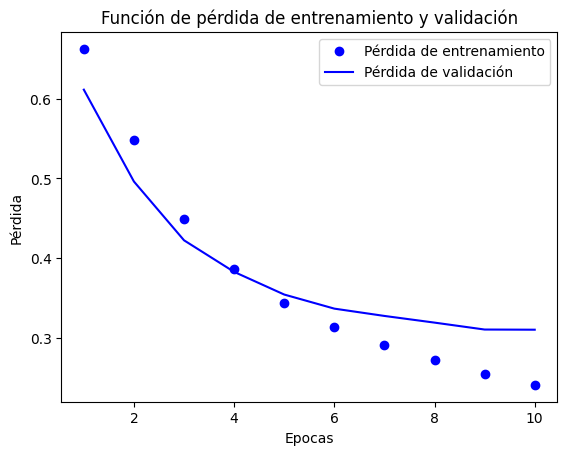

In [47]:
#graficar las función de péridad en el entrenamiento y validación del modelo en las 10 epocas

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" para punto azul
plt.plot(epochs, loss, 'bo', label='Pérdida de entrenamiento')
# "b" para línea sólida
plt.plot(epochs, val_loss, 'b', label='Pérdida de validación')
plt.title('Función de pérdida de entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Pérdida')
plt.legend()

plt.show()

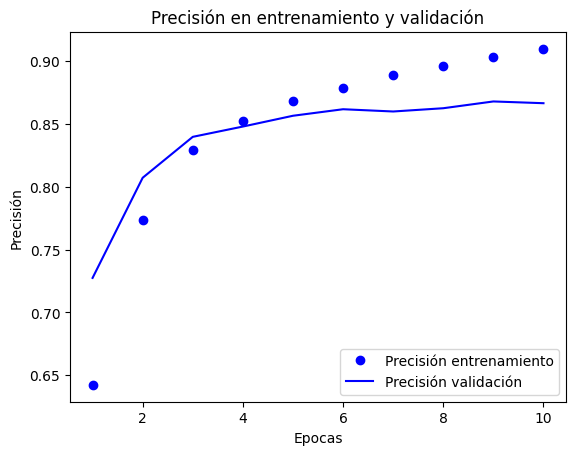

In [48]:
plt.plot(epochs, acc, 'bo', label='Precisión entrenamiento')
plt.plot(epochs, val_acc, 'b', label='Precisión validación')
plt.title('Precisión en entrenamiento y validación')
plt.xlabel('Epocas')
plt.ylabel('Precisión')
plt.legend(loc='lower right')

plt.show()

# Modelo final

In [49]:
#Crear un modelo exportado que incluye capa de vectorizacion como modelo entrenado
  # y luego evalua datos de prueba en bruto: raw_test_ds

export_model = tf.keras.Sequential([ #crea modelo secuencial con 3 capas
  vectorize_layer, #capa de vectorizacion conviete texto en num
  model, #modelo entrenado previamente con 3 capas: GlobalAveragePooling1D, dropout y capa densa
  layers.Activation('sigmoid') #capa de activación, asegura que salida de modelo sea probabildad entre 0 y 1
])

export_model.compile( #compiaci+on del modelo
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer="adam", metrics=['accuracy']
)

# evaluación del modelo en datos de prueba burto
metrics = export_model.evaluate(raw_test_ds, return_dict=True)
print(metrics)

782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.4945 - binary_accuracy: 0.0000e+00 - loss: 0.0000e+00
{'accuracy': 0.5000399947166443, 'binary_accuracy': 0.0, 'loss': 0.0}


# Predicción

In [51]:
#usar modelo "export_model" para predecir el sentimiento de nuevas frases/reviews

examples = tf.constant([ #crear un tensor constante con tres reseñas de películas en formato texto
  "The movie was great!", #expresa sentimiento positivo
  "The movie was okay.", #expesa sentimiento neutral
  "The movie was terrible..." #expresa sentimiento nefativo
])

export_model.predict(examples) #la función "export_model" toma los ejemplos "examples" para realizar prediccion
  # 1) vecotirza (texto-->num), 2) predicción utlizando capas embedding, pooling y capa final con activacion sigmoid
  # 3) la salida es un valor entre 0 y 1 para cada reseña; valor cercano a 1=Positivo, valor cercano a 0 = negativo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[0.58931154],
       [0.5523639 ],
       [0.53835344]], dtype=float32)